# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [55]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
#!pip install newsapi-python
#!pip install wordcloud
from newsapi.newsapi_client import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Office\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# Load .env enviroment variables
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [3]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])

In [4]:
# Use newsapi client to get most relevant 20 headlines per day in the past month
def get_headlines(keyword):
    all_headlines = []
    articles = newsapi.get_everything(
    q=keyword,
    language="en",
    sort_by="relevancy")
    
    headlines = []
    for i in range(0, len(articles["articles"])):
        headlines.append(articles["articles"][i]["content"])
    all_headlines.append(headlines)
    
    return all_headlines

In [5]:
# Fetch the Bitcoin news articles
bitcoin = get_headlines('bitcoin')[0]

In [6]:
# Fetch the Ethereum news articles
ethereum = get_headlines('ethereum')[0]

In [7]:
# Create function that computes average compound sentiment of headlines for each day
def headline_sentiment_summarizer_avg(headlines):
    sid = SentimentIntensityAnalyzer()
    
    text = []
    compound_score = []
    negative_score = []
    positive_score = []
    neutral_score = []
    
    for h in headlines:
        
        if h == None:
            continue
        else:
            text.append(h)
            positive_score.append(sid.polarity_scores(h)["pos"])
            negative_score.append(sid.polarity_scores(h)["neg"])
            neutral_score.append(sid.polarity_scores(h)["neu"])
            compound_score.append(sid.polarity_scores(h)["compound"])
            
        
            
    return {'text': text, 'positive_score' : positive_score, 'negative_score' : negative_score, 'neutral_score' : neutral_score, 'compound_score' : compound_score}

In [8]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_avg = headline_sentiment_summarizer_avg(bitcoin)
bitcoin_sentiments = pd.DataFrame(
    {
        "bitcoin_text": bitcoin_avg['text'],
        "bitcoin_pos": bitcoin_avg['positive_score'],
        "bitcoin_neg": bitcoin_avg['negative_score'],
        "bitcoin_neu": bitcoin_avg['neutral_score'],
        "bitcoin_compound": bitcoin_avg['compound_score']
    }
)
bitcoin_sentiments.head()

,bitcoin_text,bitcoin_pos,bitcoin_neg,bitcoin_neu,bitcoin_compound
0,When my wife started a little garden in our ur...,0.000,0.061,0.939,-0.3400
1,"Like Dogecoin devotees, the mayor of Reno, and...",0.178,0.000,0.822,0.6908
2,To get a roundup of TechCrunchs biggest and mo...,0.127,0.000,0.873,0.6240
3,While retail investors grew more comfortable b...,0.164,0.000,0.836,0.7264
4,"As longtime TechCrunch readers know well, Mich...",0.097,0.000,0.903,0.2732


In [9]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_avg = headline_sentiment_summarizer_avg(ethereum)
ethereum_sentiments = pd.DataFrame(
    {
        "ethereum_text": ethereum_avg['text'],
        "ethereum_pos": ethereum_avg['positive_score'],
        "ethereum_neg": ethereum_avg['negative_score'],
        "ethereum_neu": ethereum_avg['neutral_score'],
        "ethereum_compound": ethereum_avg['compound_score']
    }
)
ethereum_sentiments.head()

,ethereum_text,ethereum_pos,ethereum_neg,ethereum_neu,ethereum_compound
0,There are many blockchain platforms competing ...,0.075,0.000,0.925,0.3612
1,Blockchain infrastructure startups are heating...,0.000,0.061,0.939,-0.2411
2,While retail investors grew more comfortable b...,0.164,0.000,0.836,0.7264
3,Cent was founded in 2017 as an ad-free creator...,0.190,0.000,0.810,0.6956
4,Representation of the Ethereum virtual currenc...,0.000,0.000,1.000,0.0000


In [10]:
# Describe the Bitcoin Sentiment
bitcoin_sentiments.describe()

,bitcoin_pos,bitcoin_neg,bitcoin_neu,bitcoin_compound
count,20.000000,20.000000,20.00000,20.000000
mean,0.059400,0.046450,0.89415,0.048400
std,0.059611,0.083549,0.09326,0.463778
min,0.000000,0.000000,0.65300,-0.827100
25%,0.000000,0.000000,0.85325,-0.307000
50%,0.056000,0.000000,0.91050,0.000000
75%,0.092500,0.076250,0.95425,0.445000
max,0.178000,0.287000,1.00000,0.726400


In [11]:
# Describe the Ethereum Sentiment
ethereum_sentiments.describe()

,ethereum_pos,ethereum_neg,ethereum_neu,ethereum_compound
count,20.000000,20.00000,20.00000,20.000000
mean,0.056050,0.01345,0.93050,0.174515
std,0.073898,0.02766,0.08117,0.312339
min,0.000000,0.00000,0.78200,-0.340000
25%,0.000000,0.00000,0.84275,0.000000
50%,0.000000,0.00000,0.96950,0.000000
75%,0.129500,0.00000,1.00000,0.402575
max,0.190000,0.07200,1.00000,0.726400


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has the highest mean of 0.174515

Q: Which coin had the highest compound score?

A: Both has the same compound rate

Q. Which coin had the highest positive score?

A: Ethereum has the highest positive score of 0.190000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop = stopwords.words('english')

# Expand the default stopwords list if necessary
stop.append("you")
stop.append("it'")
stop.append("'s")
stop.append("not")
stop.append('…')
stop.append('char')
stop.append('')
stop = set(stop)

In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""

    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = [word.lower() for word in words]
    
    # Remove the punctuation
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    words = [word for word in words if word not in punc]
        
    # Remove the stopwords
    words = [word for word in words if word not in stop]
    
    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
    
    return tokens

In [15]:
# Create a new tokens column for Bitcoin
bitcoin_sentiments['token'] = bitcoin_sentiments.apply(lambda row: tokenizer(row['bitcoin_text']), axis = 1)

bitcoin_sentiments.head()   


,bitcoin_text,bitcoin_pos,bitcoin_neg,bitcoin_neu,bitcoin_compound,token
0,When my wife started a little garden in our ur...,0.000,0.061,0.939,-0.3400,"[wife, started, little, garden, urban, backyar..."
1,"Like Dogecoin devotees, the mayor of Reno, and...",0.178,0.000,0.822,0.6908,"[like, dogecoin, devotee, mayor, reno, leader,..."
2,To get a roundup of TechCrunchs biggest and mo...,0.127,0.000,0.873,0.6240,"[get, roundup, techcrunchs, biggest, important..."
3,While retail investors grew more comfortable b...,0.164,0.000,0.836,0.7264,"[retail, investor, grew, comfortable, buying, ..."
4,"As longtime TechCrunch readers know well, Mich...",0.097,0.000,0.903,0.2732,"[longtime, techcrunch, reader, know, well, mic..."


In [16]:
# Create a new tokens column for Ethereum
ethereum_sentiments['token'] = ethereum_sentiments.apply(lambda row: tokenizer(row['ethereum_text']), axis = 1)

ethereum_sentiments.head()  

,ethereum_text,ethereum_pos,ethereum_neg,ethereum_neu,ethereum_compound,token
0,There are many blockchain platforms competing ...,0.075,0.000,0.925,0.3612,"[many, blockchain, platform, competing, invest..."
1,Blockchain infrastructure startups are heating...,0.000,0.061,0.939,-0.2411,"[blockchain, infrastructure, startup, heating,..."
2,While retail investors grew more comfortable b...,0.164,0.000,0.836,0.7264,"[retail, investor, grew, comfortable, buying, ..."
3,Cent was founded in 2017 as an ad-free creator...,0.190,0.000,0.810,0.6956,"[cent, founded, 2017, ad-free, creator, networ..."
4,Representation of the Ethereum virtual currenc...,0.000,0.000,1.000,0.0000,"[representation, ethereum, virtual, currency, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2
N = 2
b_list = ngrams(tokenizer(str(bitcoin_sentiments['bitcoin_text'])), N)
Counter(b_list).most_common(10)

[(('reuters', 'bitcoin'), 2),
 (('representation', 'virtual'), 2),
 (('virtual', 'currency'), 2),
 (('currency', 'bitcoin'), 2),
 (('0', 'wife'), 1),
 (('wife', 'started'), 1),
 (('started', 'little'), 1),
 (('little', 'garden'), 1),
 (('garden', 'ur'), 1),
 (('ur', '...'), 1)]

In [19]:
# Generate the Ethereum N-grams where N=2
N = 2
e_list = ngrams(tokenizer(str(ethereum_sentiments['ethereum_text'])), N)
Counter(e_list).most_common(10)

[(('e', '...'), 3),
 (('representation', 'cryptocurrencies'), 2),
 (('cryptocurrencies', 'bitcoin'), 2),
 (('session', 'transform'), 2),
 (('transform', '2021'), 2),
 (('2021', 'avail'), 2),
 (('avail', '...'), 2),
 (('article', 'translated'), 2),
 (('translated', 'spanish'), 2),
 (('spanish', 'e'), 2)]

In [20]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Use token_count to get the top 10 words for Bitcoin
btc_tokens = tokenizer(str(bitcoin_sentiments['bitcoin_text']))
token_count(btc_tokens, 10)

[('...', 20),
 ('bitcoin', 5),
 ('reuters', 4),
 ('representation', 3),
 ('july', 2),
 ('virtual', 2),
 ('currency', 2),
 ('0', 1),
 ('wife', 1),
 ('started', 1)]

In [22]:
# Use token_count to get the top 10 words for Ethereum
eth_tokens = tokenizer(str(ethereum_sentiments['ethereum_text']))
token_count(eth_tokens, 10)

[('...', 20),
 ('representation', 5),
 ('cryptocurrencies', 3),
 ('bitcoin', 3),
 ('e', 3),
 ('blockchain', 2),
 ('ethereum', 2),
 ('virtual', 2),
 ('5', 2),
 ('session', 2)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

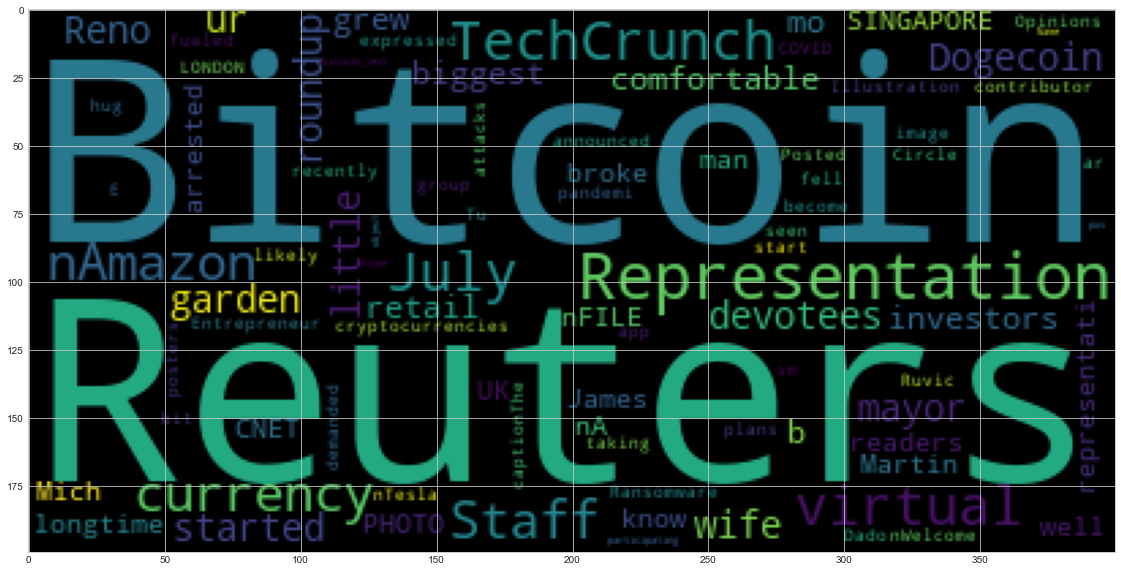

In [28]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(str(bitcoin_sentiments['bitcoin_text']))
plt.imshow(wc)

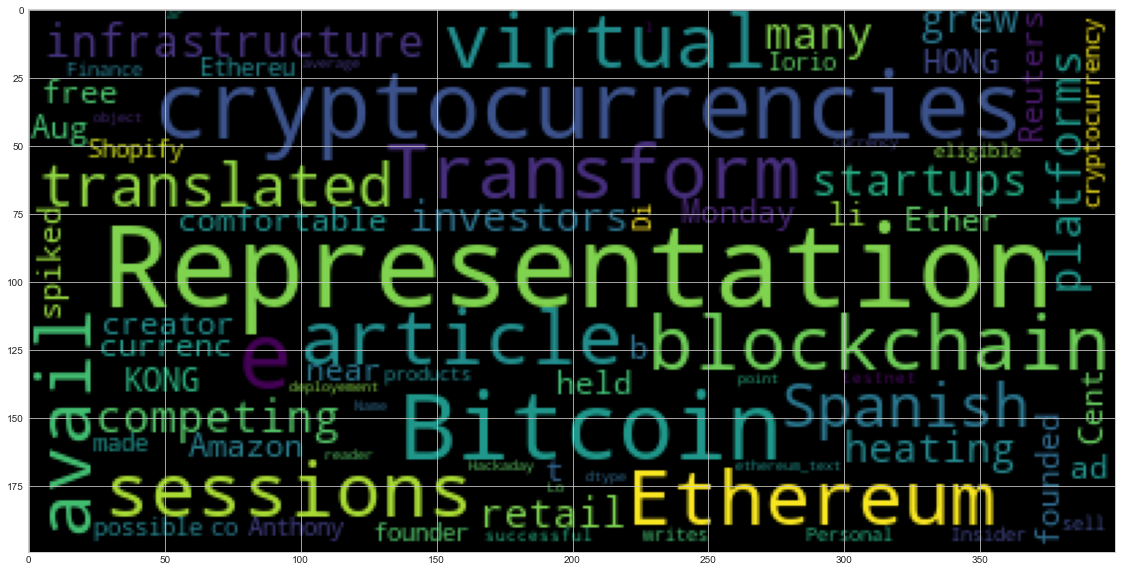

In [29]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(str(ethereum_sentiments['ethereum_text']))
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [34]:
#!pip install spacy
#!python -m spacy download en_core_web_sm
import spacy
from spacy import displacy

In [36]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm

In [37]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [51]:
# Concatenate all of the Bitcoin text together
bitcoin_text = bitcoin_sentiments.bitcoin_text.str.cat()
bitcoin_text

"When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars]Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars]To get a roundup of TechCrunchs biggest and most important stories delivered to your inbox every day at 3 p.m. PDT, subscribe here.\r\nHello and welcome to Daily Crunch for July 23, 2021. Its been an i… [+5456 chars]While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application world still has a lot of work to do when it comes to onboarding a… [+2288 chars]As longtime TechCrunch readers know well, Michael Arrington cofounded TechCrunch and Crunchbase, as well as the venture fund CrunchFund, whic

In [48]:
# Run the NER processor on all of the text
btc_ner = nlp(bitcoin_text)

# Add a title to the document
btc_ner.user_data["title"] = "Bitcoin NER"

In [44]:
# Render the visualization
displacy.render(btc_ner, style='ent', jupyter=True)

In [46]:
# List all Entities
for i in btc_ner.ents:
    print(i.text, i.label_)

Reno GPE
El Salvador GPE
Aldo Baoicchi GPE
Canadian NORP
Daymak ORG
every day DATE
3 p.m. PDT TIME
Daily Crunch ORG
July 23, 2021 DATE
Bitcoin and Ethereum ORG
2021 DATE
Michael Arrington PERSON
TechCrunch LOC
Crunchbase ORG
CrunchFund PRODUCT
Tuesday DATE
2017 DATE
July 28 DATE
Reuters ORG
40,000 MONEY
Wednesday DATE
chars]James Martin PERSON
UK GPE
Spain GPE
Twitter PRODUCT
2020 DATE
the US Department of Justi ORG
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/IllustrationSINGAPORE ORG
July 21 DATE
Reuters ORG
Reuters ORG
FILE ORG
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/Illustration
SINGAPORE ORG
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
Ju PERSON
Dado Ruvic/Illustration
Welcome ORG
10 CARDINAL
the Opening Bell ORG
first ORDINAL
Entrepreneur ORG
first ORDINAL
more than three decades ago DATE
six months ago DATE
dozens CARDINAL
February 9, 2021 DATE
REUTERS ORG
Dado GPE
Reuters ORG
Tesla Inc ORG
2020 DATE
Kaseya PERSON
Russian NORP
hundreds CARDINAL
Concord Acquisition Cor

---

### Ethereum NER

In [50]:
# Concatenate all of the Bitcoin text together
ethereum_text = ethereum_sentiments.ethereum_text.str.cat()
ethereum_text

'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote… [+2563 chars]Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto s… [+2468 chars]While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application world still has a lot of work to do when it comes to onboarding a… [+2288 chars]Cent was founded in 2017 as an ad-free creator network that allows users to offer each other crypto rewards for good posts and comments — it’s like gifting awards on Reddit, but with Ethereum. But in… [+6228 chars]Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/

In [52]:
# Run the NER processor on all of the text
eth_ner = nlp(ethereum_text)

# Add a title to the document
eth_ner.user_data["title"] = "Ethereum NER"

In [53]:
# Render the visualization
displacy.render(eth_ner, style='ent', jupyter=True)

In [54]:
# List all Entities
for i in eth_ner.ents:
    print(i.text, i.label_)

Ethereum PERSON
Ethereum Killers WORK_OF_ART
Solana PERSON
Bitcoin and Ethereum ORG
2021 DATE
2017 DATE
Reddit NORP
Ethereum PERSON
Ethereum PERSON
February 3, 2018 DATE
REUTERS ORG
Dado Ruvic PERSON
Aug 5 DATE
Reuters ORG
Aug 5 DATE
Reuters ORG
two-month DATE
Thursday DATE
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationAug 3 PERSON
Reuters ORG
Ethereum PERSON
Monday DATE
Amazon ORG
Amazon ORG
Di Iorio PERSON
Ethereum PERSON
Bloomberg PERSON
Slashdot NORP
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
July 30 DATE
Reuters ORG
second ORDINAL
Livepeer PERSON
$20 million MONEY
Ethereum PERSON
Spanish NORP
AI ORG
Xoy Capital PERSON
Guadalajara GPE
Jalisco GPE
Xoycoin PERSON
Monday DATE
Chicago Bulls ORG
American Express ORG
Spanish NORP
AI ORG
The Securities and Exchange Commission ORG
London GPE
Ethereum PERSON
12 965 000 CARDINAL
August 3-5, 2021 DATE
Clie PERSON
Hackaday DATE
Proof of Work WORK_OF_ART
Bitcoin, Ethereum ORG
Polygon ORG
$100 millio

---